# What is the most common street name in Australia?
## Cleaning OSM data

For this first step we are just considering Sydney. Firstly because I live in Sydney, familiar with the streets so I can easily sanity check the answers. Secondly because Australia is just too big to deal with initially. Once we complete this analysis on Australia, we will apply it to the entire of Australia.

I downloaded this data in geojson form from __[metro extracts](https://mapzen.com/data/metro-extracts/)__ that is sadly going away at the end of January 2018. This gives you a folder with lots of different types 

### Reading
First we need to read in the data. To do this I'm using geopandas as it can handle the geometry column. As a first round of basic cleaning I'm removing all streets that do not have a defined name and then changing the street name to all lower case

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import shapely
%matplotlib inline

In [32]:
streets = gpd.read_file('Sydney/ex_skDAYAuv8avqtvLU5LSdM4Fc7xxkR_roads_gen0.geojson')

In [35]:
# len(streets)

22709

In [34]:
clean_streets

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
0,None,0,highway,LINESTRING (151.2424485234584 -33.886582826295...,1.0,edgecliff road,0,1986039.0,None,None,0,residential,3.0
2,None,0,highway,LINESTRING (151.193104343295 -33.8876124592810...,3.0,cleveland street,1,1954876.0,None,None,0,primary,6.0
3,None,0,highway,LINESTRING (151.2112821767074 -33.845685509054...,4.0,cliff street,1,1986113.0,None,None,0,unclassified,3.0
4,None,0,highway,LINESTRING (151.0978939698709 -33.913194279223...,5.0,anglo road,1,1881386.0,None,None,0,residential,3.0
6,None,0,highway,LINESTRING (151.2108830304782 -33.847941079198...,7.0,northcliff street,1,1986116.0,None,None,0,residential,3.0
7,None,0,highway,LINESTRING (151.214294884165 -33.8460758542856...,8.0,burton street,0,1986123.0,None,None,0,residential,3.0
9,None,0,highway,LINESTRING (151.2844036368792 -33.799186565923...,10.0,east esplanade,0,1999322.0,None,None,0,tertiary,4.0
10,None,0,highway,LINESTRING (151.2422065379138 -33.874905577889...,11.0,william street,0,1986065.0,None,None,0,secondary,5.0
11,None,0,highway,LINESTRING (151.2943003175943 -33.812494010678...,12.0,north head scenic drive,0,1999796.0,None,None,0,tertiary_link,3.0
14,None,0,highway,LINESTRING (151.2081345206086 -33.873118304675...,15.0,park street,1,1884057.0,None,None,0,secondary,5.0


In [3]:
streets = gpd.read_file('Sydney/ex_skDAYAuv8avqtvLU5LSdM4Fc7xxkR_roads.geojson')

In [4]:
streets = streets[~streets["name"].isnull()]
streets["name"] = streets["name"].apply(lambda x: x.lower())

This is what the data we get from zen maps looks likes:

In [5]:
streets.head()

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
0,None,0,highway,LINESTRING (151.2424485234584 -33.886582826295...,1.0,edgecliff road,0,1986039.0,None,None,0,residential,3.0
2,None,0,highway,LINESTRING (151.193104343295 -33.8876124592810...,3.0,cleveland street,1,1954876.0,None,None,0,primary,6.0
3,None,0,highway,LINESTRING (151.2112821767074 -33.845685509054...,4.0,cliff street,1,1986113.0,None,None,0,unclassified,3.0
4,None,0,highway,LINESTRING (151.0978939698709 -33.913194279223...,5.0,anglo road,1,1881386.0,None,None,0,residential,3.0
6,None,0,highway,LINESTRING (151.2108830304782 -33.847941079198...,7.0,northcliff street,1,1986116.0,None,None,0,residential,3.0


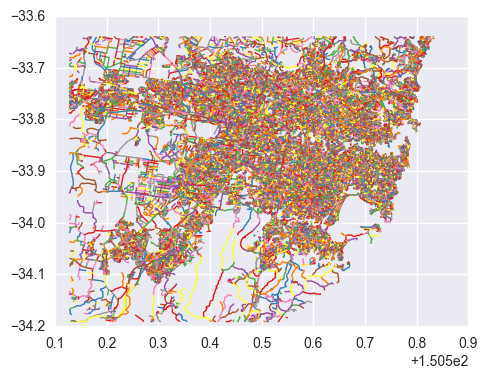

In [6]:
streets['geometry'].plot()

## Data Cleanup
In OSM there is a lot more than just streets that are included. First we are going to exclude these streets.

First we will consider the class column: here we have *highway*, *railway* and *man-made*. The railway class include rail-lines (both goods and passenger), light rail lines (used and disued). These are not streets

In [8]:
streets[streets["class"] == 'railway']

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
58,None,0,railway,LINESTRING (151.196358365745 -33.8687554402545...,59.0,Inner West Light Rail,1,2654260.0,None,None,0,light_rail,7.0
104,None,0,railway,LINESTRING (151.2011414987909 -33.879140366829...,105.0,Inner West Light Rail,1,2761538.0,None,None,0,light_rail,7.0
179,None,0,railway,LINESTRING (151.2070169614585 -33.881036604784...,180.0,None,1,2949708.0,None,None,0,light_rail,7.0
361,None,0,railway,LINESTRING (151.1997885757997 -33.877948376379...,362.0,The Goodsline,0,3188010.0,None,None,0,disused,7.0
565,None,0,railway,LINESTRING (151.1914580536927 -33.895390865426...,566.0,None,0,3726276.0,Western Siding,yard,0,rail,7.0
952,None,1,railway,LINESTRING (151.1959432938998 -33.937350253617...,953.0,None,0,4331725.0,None,None,0,rail,37.0
971,None,0,railway,LINESTRING (151.1688774580003 -33.920945360364...,972.0,None,0,4331845.0,None,None,0,rail,7.0
973,None,0,railway,LINESTRING (151.1910183390522 -33.932442565490...,974.0,None,0,4331765.0,None,None,0,rail,7.0
1134,None,0,railway,LINESTRING (151.0687451472137 -33.887053051063...,1135.0,None,0,4341342.0,None,spur,0,rail,7.0
1159,None,0,railway,LINESTRING (151.0685417184237 -33.880858321703...,1160.0,None,0,4341499.0,None,siding,0,rail,7.0


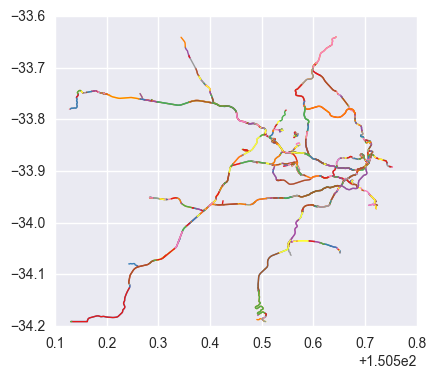

In [9]:
streets[streets["class"] == 'railway']["geometry"].plot()

Lets look at the man-made class. This contains thing susch as Fish Market and Taronga Zoo Ferry Wharf. Also not we would call streets.

(In Sydney this class contains piers and groyne)

In [10]:
streets[streets["class"] == 'man_made'].head()

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
406,None,0,man_made,LINESTRING (151.1486958468153 -34.059200662259...,407.0,Gunnamatta Baths,0,3619874.0,None,None,0,pier,0.0
491,None,0,man_made,LINESTRING (151.1501344328569 -34.056000870723...,492.0,None,0,3681494.0,None,None,0,pier,0.0
983,None,0,man_made,LINESTRING (151.1901614570908 -33.872610361343...,984.0,None,0,4332268.0,None,None,0,pier,0.0
984,None,0,man_made,LINESTRING (151.1909980548465 -33.873133140643...,985.0,Fish Market,0,4332267.0,None,None,0,pier,20.0
985,None,0,man_made,LINESTRING (151.1892821954478 -33.871995632564...,986.0,None,0,4332270.0,None,None,0,pier,0.0
1031,None,0,man_made,LINESTRING (151.228668423184 -33.8623220781117...,1032.0,None,0,4333820.0,None,None,0,pier,0.0
1070,None,0,man_made,LINESTRING (151.2802279403563 -33.645735041212...,1071.0,None,0,4335940.0,None,None,0,pier,0.0
1142,None,0,man_made,LINESTRING (151.1686243245244 -33.948267263405...,1143.0,None,0,4343325.0,None,None,0,pier,0.0
1174,private,0,man_made,LINESTRING (151.1930428201256 -33.837839460951...,1175.0,None,0,4354509.0,None,None,0,pier,0.0
1175,None,0,man_made,LINESTRING (151.2452296389314 -33.872377009158...,1176.0,Double Bay Marina,0,4354558.0,None,None,0,pier,0.0


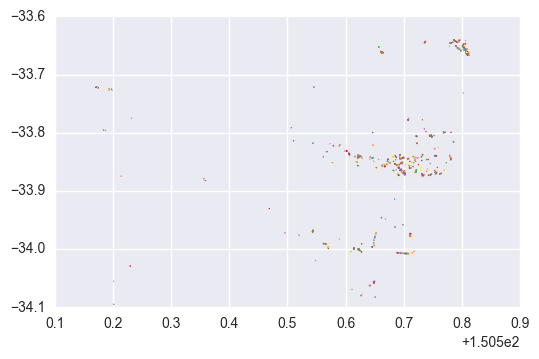

In [11]:
streets[streets["class"] == 'man_made']["geometry"].plot()

This leaves us with the highway class which contains actual roads, among other things. These other things are going to cause us problems as they include road type such as 'footway' and 'cycleway which are not roads. All of this information is contained in the 'type' attribute. For a complete list of highway types and explanation on what they are, have a look at the  __[OSM wiki](http://www.wiki.openstreetmap.org/wiki/Key:highway)__


The highway types we see in Sydney include:


## Eventually remove the below

To do here
* Introduce the access column: remove the private roads
* Make a plot showing the removed streets (coloured), under an opaque one of actual streets
* Check that my get streets function does it properly - might be able to do it simpler


In [12]:
streets[streets["class"] == 'highway']["type"].unique()

array(['residential', 'footway', 'primary', 'unclassified', 'tertiary',
       'secondary', 'tertiary_link', 'service', 'cycleway', 'pedestrian',
       'path', 'trunk', 'steps', 'primary_link', 'living_street',
       'motorway_link', 'secondary_link', 'motorway', 'track',
       'trunk_link', 'bridleway', 'raceway', 'road'], dtype=object)

At this point I need to decide what is a road. Where do I draw the line between footway (pedestrains only), living_street (pedestrians have priority), cycleway (bikes allowed) or secondary_link?

I decided I wanted to be as incusive as possible with this definition. Motorways should be included as they have name, such as the Hume Highway (some have less interesting names like the M5 Motorway). I felt that link roads should be included as they are also mostly named. Although there are also ones named 'Westlink M7 onramp', there shouldn't be so many of them that Westlink M7 is a contender for the most common street name. 

While I tried to be as inclusive as possible, a street is something a car can drive on. This means I will remove the pedestrian and on-car orientated streets. 

There is also the 'access' column which gives information on who can access this road. 

In [18]:
streets["access"].unique()

array([None, 'yes', 'private', 'public', 'no', 'designated', 'permissive',
       'destination', 'psv', 'delivery', 'official', 'hgv', 'bus',
       'yes|bicycle|yes|yes', 'yes|yes|bicycle|yes|yes', 'military'], dtype=object)

I wanted to keep as many streets as possible, but also keep it to roads that are public. Roads that I can see and drive down. This means I will remove any private roads, no access roads, military roads and HGV.

Note that 'None' just means that no access conditions have been recorded. 


In [20]:
streets[streets["access"] == 'hgv']

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
80102,hgv,0,highway,LINESTRING (150.8354220480671 -33.888192906075...,80103.0,truck stopping bay,0,225102002.0,None,None,0,service,0.0


Lastly there is service. This tag provides additional context on what the road is used for. There are a few services I want to exclude. Namely, driveway, private_road, bicycle_training_track, go-kart, drive-through (bye KFC drive-through) as they are not public roads I can drive on. I've kept parking_aile as I could drive on it inthe process to parking.

In [15]:
streets["service"].unique()

array([None, 'alley', 'parking_aisle', 'yard', 'spur', 'siding',
       'driveway', 'bus', 'emergency_access', 'yes', 'private_road',
       'bicycle_training_track', 'go-kart', 'drive-through', 'slipway',
       'crossover', 'Lane', 'parking lane', 'access', 'depot', 'parking',
       'lane', 'laneway'], dtype=object)

In [23]:
def get_streets(df):
    clean_streets = df.dropna(subset = ["name"])
#     clean_streets.loc[:,"name"] = clean_streets["name"].apply(lambda x: x.lower())
    
    clean_streets = clean_streets[clean_streets["class"] == 'highway']
    
    
    clean_streets = clean_streets[clean_streets["type"] != "footway"]
    clean_streets = clean_streets[clean_streets["type"] != "cycleway"]
    clean_streets = clean_streets[clean_streets["type"] != "bridleway"]
    clean_streets = clean_streets[clean_streets["type"] != "track"]
    clean_streets = clean_streets[clean_streets["type"] != "raceway"]
    clean_streets = clean_streets[clean_streets["type"] != "pedestrian"]
    clean_streets = clean_streets[clean_streets["type"] != "steps"]
    clean_streets = clean_streets[clean_streets["type"] != "path"]
    
    clean_streets = clean_streets[clean_streets["access"] != "private"]
    clean_streets = clean_streets[clean_streets["access"] != "no"]
    clean_streets = clean_streets[clean_streets["access"] != "military"]
    clean_streets = clean_streets[clean_streets["access"] != "HGV"]
    
    clean_streets = clean_streets[clean_streets["service"] != "private_road"]
    clean_streets = clean_streets[clean_streets["service"] != "bicycle_training_track"]
    clean_streets = clean_streets[clean_streets["service"] != "go-kart"]
    clean_streets = clean_streets[clean_streets["service"] != "drive-through"]
    
    return clean_streets

In [27]:
clean_streets = get_streets(streets)
len(clean_streets),  len(streets)

-3268

All of this processing removes just 3268 from Sydney. One final word. To save the file you need to use the geopandas function to_file. This has the unfortunate side effect of making the working file much bigger - 55MB compared to 9MB. 

In [31]:
clean_streets.to_file("clean_streets_sydney.geojson")

This is all for cleaning up OSM street data. Next we will do some exploration on Sydney and other adjustments that need to be done. 

### Initial exploring
The initial dataframe is looking good. Before separating out the street descriptor from the streetname, what is the most common complete street name?

In [5]:
clean_streets.groupby("name").count()["id"].sort_values(ascending = False).head(10)

name
victoria road        197
pacific highway      191
princes highway      155
westlink m7          145
church street        137
george street        131
m2 hills motorway    130
windsor road         124
western motorway     119
parramatta road      117
Name: id, dtype: int64

Victoria Road sounds about right - but Pacific Highway as the second most common name? Something wrong is going here

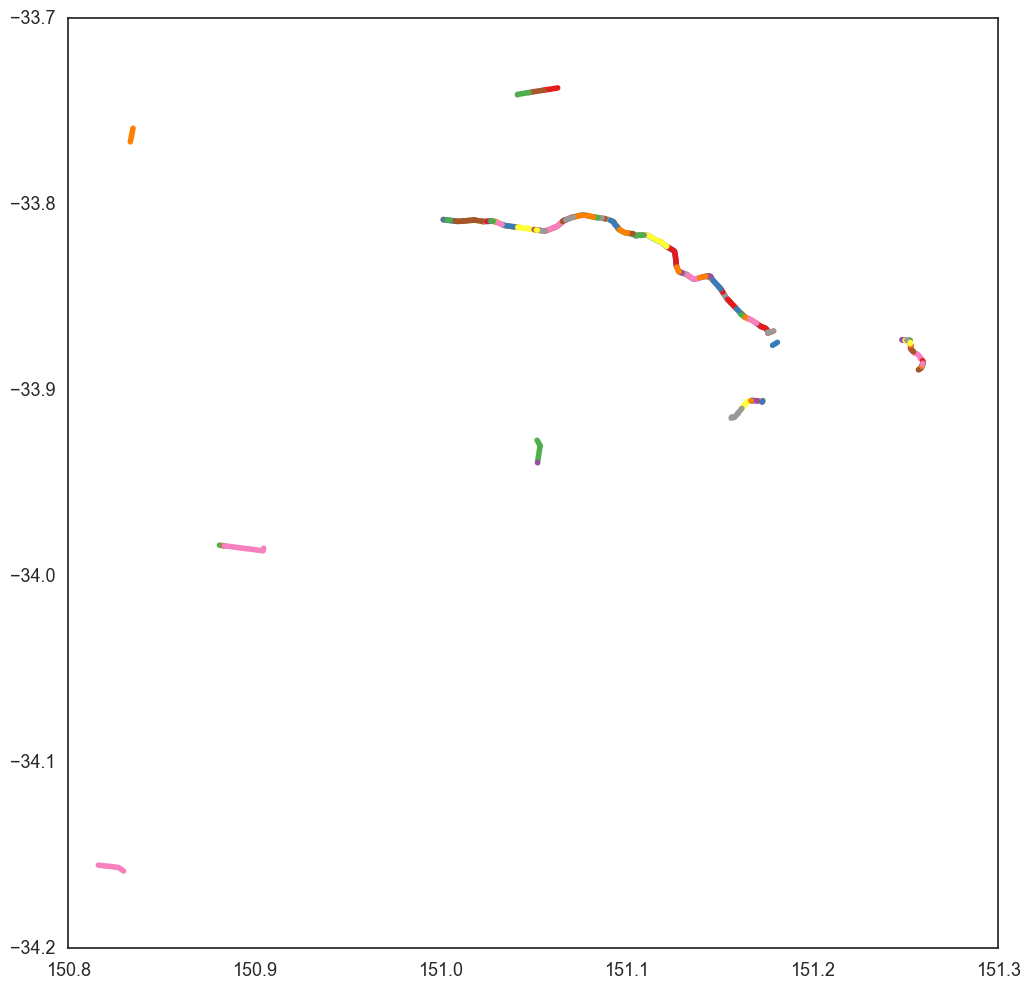

In [37]:
sns.set_style('white')
# plt.rcParams['figure.figsize']=(12,20)
victoria_road = clean_streets[clean_streets["name"] == "victoria road"]
ax = victoria_road["geometry"].plot(linewidth = 4, figsize = (12, 20))
ax.get_xaxis().get_major_formatter().set_useOffset(False)
# ax.set_xlabel("longitude")
# ax.set_ylabel("latiude")
# ax.set_title("Victoria Road")
# ax.figure.set_size_inches(12, 20)
ax.figure.savefig("victoria_road.png")

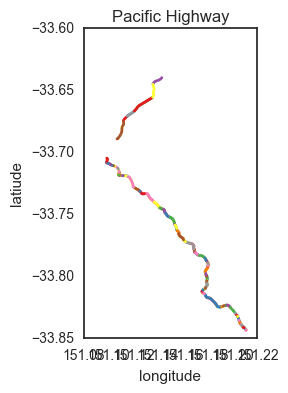

In [7]:
sns.set_style('white')
pacific = clean_streets[clean_streets["name"] == "pacific highway"]
ax = pacific["geometry"].plot(linewidth = 2)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.set_xlabel("longitude")
ax.set_ylabel("latiude")
ax.set_title("Pacific Highway")
ax.figure.savefig("pacific.png")

Have a look at that big long multi-coloured Victoria Road. OSM defines streets in terms of street segments, so a single street can appear multiple times. The multiple joint Victoria roads we can see is really one 20km long road. So before we can do anything we need to join up these segments into the right streets. These line segments are often for each interesection. Roads with a sperator down the middle will also be recorded as two line segmnets - one for each direction of the traffic to indicate it is not possible to do a u-turn on these roads. 

The coordinates of the streets are recorded in the geometry column as a shapely lingstring type. Lets first try to join these together. Instead of victoria road, I'm going to work with anzac parade as there is only one of those in Sydney



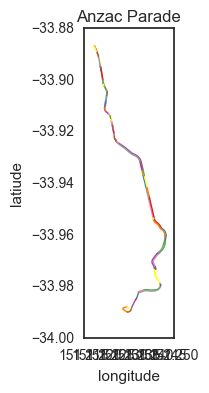

In [8]:
anzac_parade = clean_streets[clean_streets["name"] == "anzac parade"]
ax = anzac_parade["geometry"].plot()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

ax.set_xlabel("longitude")
ax.set_ylabel("latiude")
ax.set_title("Anzac Parade")

In [12]:
len(streets)

119197

In [9]:
def reduce_street_distance(street):
    
    # Make everything a list so we can easily ad to it later
    street = street.apply(lambda x: x.apply(lambda y: [y]))
    
   
    whole_street = street.copy()
    current_street = []
    
     # Keep on repeating while we are still reducing the number of streets
    while len(whole_street) != len(current_street):

        used = [] # keeps track on the street id-s that have already been merged into another string
        current_street = pd.DataFrame(whole_street)
        whole_street = []

        count = 0

        for s, segment in current_street.iterrows():

            if segment["id"] in used:
                continue

            segment_points = [(coords[0], coords[1]) for seg in segment["geometry"] for coords in seg.coords[:]]
            to_join = [segment]


            for s2, segment2 in current_street.iloc[count+1:].iterrows():


                segment_points2 = [(coords[0], coords[1]) for seg in segment2["geometry"] for coords in seg.coords[:]]

                # Calculate the distance between the points
                
                # Limit things within 100km of the first point
                if distance(segment_points, segment_points2) < 1:
                    if 
                    
#                 common = list(set(segment_points).intersection(segment_points2))   
#                 if len(common) > 0:
#                     used.append(segment2["id"])
#                     to_join.append(segment2)


            # Once found all common points, join
            new_point = pd.Series(data={"access": [seg["access"] for seg in to_join],
                            "bridge": [seg["bridge"] for seg in to_join],
                            "class": [seg["class"] for seg in to_join],
                            "geometry": [coords  for seg in to_join for coords in seg["geometry"]],
                            "id": [seg["id"]  for seg in to_join],
                            "name": segment["name"],
                            "oneway": [seg["oneway"] for seg in to_join],
                            "osm_id": [seg["osm_id"]  for seg in to_join],
                            "ref": [seg["ref"] for seg in to_join],
                            "service":[seg["service"]  for seg in to_join],
                            "tunnel":[seg["tunnel"]  for seg in to_join],
                            "type":[seg["type"]  for seg in to_join],
                            "z_order":[seg["z_order"] for seg in to_join] })

            whole_street.append(new_point)
            count += 1


 
    return pd.DataFrame(whole_street)

SyntaxError: invalid syntax (<ipython-input-9-735890f34370>, line 37)

In [10]:
def reduce_street_1(street):
    
    # Make everything a list so we can easily ad to it later
    street = street.apply(lambda x: x.apply(lambda y: [y]))
    
   
    whole_street = street.copy()
    current_street = []
    
     # Keep on repeating while we are still reducing the number of streets
    while len(whole_street) != len(current_street):

        used = [] # keeps track on the street id-s that have already been merged into another string
        current_street = pd.DataFrame(whole_street)
        whole_street = []

        count = 0

        for s, segment in current_street.iterrows():

            if segment["id"] in used:
                continue

            segment_points = [(coords[0], coords[1]) for seg in segment["geometry"] for coords in seg.coords[:]]
            to_join = [segment]


            for s2, segment2 in current_street.iloc[count+1:].iterrows():


                segment_points2 = [(coords[0], coords[1]) for seg in segment2["geometry"] for coords in seg.coords[:]]

                common = list(set(segment_points).intersection(segment_points2))   
                if len(common) > 0:
                    used.append(segment2["id"])
                    to_join.append(segment2)


            # Once found all common points, join
            new_point = pd.Series(data={"access": [seg["access"] for seg in to_join],
                            "bridge": [seg["bridge"] for seg in to_join],
                            "class": [seg["class"] for seg in to_join],
                            "geometry": [coords  for seg in to_join for coords in seg["geometry"]],
                            "id": [seg["id"]  for seg in to_join],
                            "name": segment["name"],
                            "oneway": [seg["oneway"] for seg in to_join],
                            "osm_id": [seg["osm_id"]  for seg in to_join],
                            "ref": [seg["ref"] for seg in to_join],
                            "service":[seg["service"]  for seg in to_join],
                            "tunnel":[seg["tunnel"]  for seg in to_join],
                            "type":[seg["type"]  for seg in to_join],
                            "z_order":[seg["z_order"] for seg in to_join] })

            whole_street.append(new_point)
            count += 1


 
    return pd.DataFrame(whole_street)

In [11]:
anzac_parade_reduce_1 = anzac_parade.groupby("name").apply(lambda x: reduce_street_1(x))

In [12]:
len(anzac_parade), len(anzac_parade_reduce_1)

(105, 9)

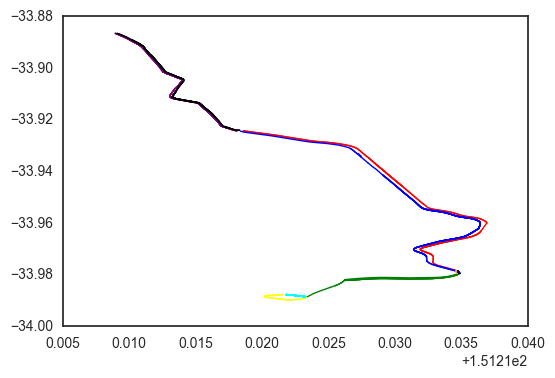

In [13]:
colours = ["red", "blue", "green", "yellow", "purple", "black", "orange", "navy", "cyan"]

ax = plt.gca()
for l, line in enumerate(anzac_parade_reduce_1["geometry"]):
    
    gpd.GeoDataFrame(geometry = anzac_parade_reduce_1["geometry"].iloc[l]).plot(color = colours[l], ax = ax)


We have reduced Anzac parade into 9 segments - down from over a 100. Put as we can see these segments are all part of  the same road but with slight gaps and the two way streets. To fix this up we need these streets ot be close to each other.

We will truncate the  coordinates to 2 decimal places (1 degree = 100km, .1 = 10km, .01= 1km). Roads that are less than 2km apart in either cardinal direction will be merged. It is 2km rather than 1km as we could have a street at (1, 1) and another at (1, 1.004)

(.5, .5) (1.49999, 1.49999) # the furtherest away two points can be
(.5, .5), (.4999, .499)
FIX UP THIS LOGIC FLOW

In [14]:
def reduce_street_2(street):
    
    # Make everything a list so we can easily ad to it later
    street = street.apply(lambda x: x.apply(lambda y: [y]))
    
   
    whole_street = street.copy()
    current_street = []
    
     # Keep on repeating while we are still reducing the number of streets
    while len(whole_street) != len(current_street):

        used = [] # keeps track on the street id-s that have already been merged into another string
        current_street = pd.DataFrame(whole_street)
        whole_street = []

        count = 0

        for s, segment in current_street.iterrows():

            if segment["id"] in used:
                continue

            segment_points = [(round(coords[0], 2), round(coords[1], 2)) for seg in segment["geometry"] for coords in seg.coords[:]]
            to_join = [segment]


            for s2, segment2 in current_street.iloc[count+1:].iterrows():


                segment_points2 = [(round(coords[0], 2), round(coords[1], 2)) for seg in segment2["geometry"] for coords in seg.coords[:]]

                common = list(set(segment_points).intersection(segment_points2))   
                if len(common) > 0:
                    used.append(segment2["id"])
                    to_join.append(segment2)


            # Once found all common points, join
            new_point = pd.Series(data={"access": [seg["access"] for seg in to_join],
                            "bridge": [seg["bridge"] for seg in to_join],
                            "class": [seg["class"] for seg in to_join],
                            "geometry": [coords  for seg in to_join for coords in seg["geometry"]],
                            "id": [seg["id"]  for seg in to_join],
                            "name": segment["name"],
                            "oneway": [seg["oneway"] for seg in to_join],
                            "osm_id": [seg["osm_id"]  for seg in to_join],
                            "ref": [seg["ref"] for seg in to_join],
                            "service":[seg["service"]  for seg in to_join],
                            "tunnel":[seg["tunnel"]  for seg in to_join],
                            "type":[seg["type"]  for seg in to_join],
                            "z_order":[seg["z_order"] for seg in to_join] })

            whole_street.append(new_point)
            count += 1


 
    return pd.DataFrame(whole_street)

In [15]:
anzac_parade_reduce_2 = anzac_parade.groupby("name").apply(lambda x: reduce_street_2(x))

In [16]:
len(anzac_parade), len(anzac_parade_reduce_2)

(105, 1)

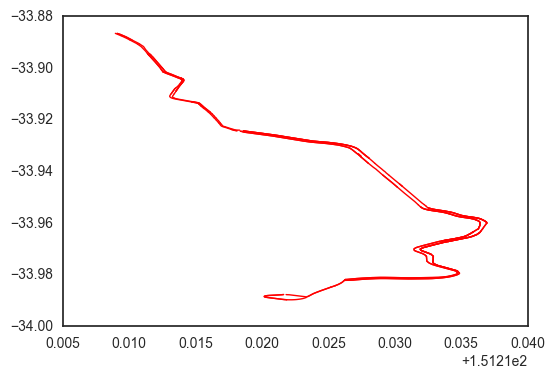

In [17]:
colours = ["red", "blue", "green", "yellow", "purple", "black", "orange", "navy", "cyan"]

ax = plt.gca()
for l, line in enumerate(anzac_parade_reduce_2["geometry"]):
    
    gpd.GeoDataFrame(geometry = anzac_parade_reduce_2["geometry"].iloc[l]).plot(color = colours[l], ax = ax)


Need to test this on victoria road. But it looks all good

In [18]:
anzac_parade_reduce["geometry"].apply(lambda x: shapely.ops.linemerge([y for y in x]) )

NameError: name 'anzac_parade_reduce' is not defined

In [ ]:
anzac_parade

In [22]:
# First step: use line merge to get all the obvious ones together, then run the other function over everything
# Get each point for line, put buffer around

def merge_lines(streets):
    
    # do a line merge - maybe if there is say less than 2000 streets with a single name ignore it
#     streets_merged = streets["geometry"].apply(lambda x: shapely.ops.linemerge(x))
    
#     street
    street_name = streets["name"].iloc[0]
    streets_merged = streets.copy()
    
    distance = .001 # 1 = 100km, .1 = 10km, .01 = 1km
    
    # create a distance matrix
    dist = streets_merged["geometry"].apply(lambda x: streets_merged["geometry"].apply(lambda y: x.distance(y)))
    
    new_df = []
    used = []
    for street in streets.index:
        
        # Check if street has been added
        if street in used:
            continue
        
        # Put all streets < 100m away from this street on a stack
        curr_street = dist.loc[street]
        close_seg = curr_street[curr_street < distance]

        one_street = [val for val in close_seg.index.values]

        i = 0
        while True:
            try:
                # pop item from stack
                next_street = one_street[i]
                i = i + 1
                
                # push all streets that are within 10m and haven't already been added
                curr_street = dist.loc[next_street]
                close_seg = curr_street[curr_street < distance]
                
                new_streets = [st for st in close_seg.index if st not in one_street]
  
                one_street.extend(new_streets)
            except IndexError:
                break
            
        used.extend(one_street)
        
        # Make a new row for a DF
        new_point = pd.Series(data={"access": [streets.loc[id]["access"] for id in one_street],
                                    "bridge": [streets.loc[id]["bridge"] for id in one_street],
                                     "class": [streets.loc[id]["class"] for id in one_street],
                                     "geometry": [streets.loc[id]["geometry"] for id in one_street],
                                     "id": [streets.loc[id]["id"]  for id in one_street],
                                     "name": street_name,
                                     "oneway": [streets.loc[id]["oneway"] for id in one_street],
                                     "osm_id": [streets.loc[id]["osm_id"]  for id in one_street],
                                     "ref": [streets.loc[id]["ref"] for id in one_street],
                                     "service":[streets.loc[id]["service"] for id in one_street],
                                     "tunnel":[streets.loc[id]["tunnel"]  for id in one_street],
                                     "type":[streets.loc[id]["type"] for id in one_street],
                                     "z_order":[streets.loc[id]["z_order"] for id in one_street] })
        new_df.append(new_point)
    
    return pd.DataFrame(new_df)
    
    # also want to return the type of street etc.Counting


In [38]:
sydney_reduced = clean_streets.groupby('name').apply(lambda x: merge_lines(x))

In [39]:
sydney_reduced.groupby('name')['id'].count().sort_values(ascending = False)

name
short street               46
george street              44
william street             44
john street                38
church street              37
king street                36
albert street              34
arthur street              34
victoria street            34
charles street             33
james street               32
station street             31
edward street              31
mary street                29
high street                29
stanley street             28
smith street               26
cross street               26
the avenue                 26
margaret street            26
first avenue               26
park street                26
second avenue              26
queen street               25
hunter street              25
campbell street            25
park road                  24
the crescent               24
francis street             24
western motorway onramp    24
                           ..
monte bello close           1
monteclair avenue           1
monte

In [ ]:
merge_lines(anzac_parade)

In [23]:
vic_linemerge = shapely.ops.linemerge(victoria_road["geometry"].values)

print(vic_linemerge)

MULTILINESTRING ((150.8298032392747 -34.15843451684535, 150.8293112215584 -34.15804274669102, 150.827125891763 -34.15651707267536, 150.824228351655 -34.15616637384659, 150.8230264705589 -34.15601181155208, 150.8204622787401 -34.15575431948659, 150.8162348658745 -34.15525400368617), (150.8334433321849 -33.76640008110822, 150.8336361997769 -33.76539827604094, 150.8336591661916 -33.76527841482556, 150.8337450806991 -33.76483216230059, 150.8339722302752 -33.76365081686731, 150.8341453165757 -33.76280432846581, 150.8342266210365 -33.76240685861734, 150.8342985377656 -33.76203771960158, 150.8346123562205 -33.76042780745905, 150.8348861929972 -33.75908267963774), (150.8813690428743 -33.98322281712458, 150.8815617428282 -33.98325190232859, 150.8819514175068 -33.98332440579102, 150.8833294862076 -33.98349765972964), (150.8833294862076 -33.98349765972964, 150.8835212641521 -33.98349556425384, 150.8835983776614 -33.98348131501845, 150.8836636726871 -33.98348030919007), (150.8836599846497 -33.9835

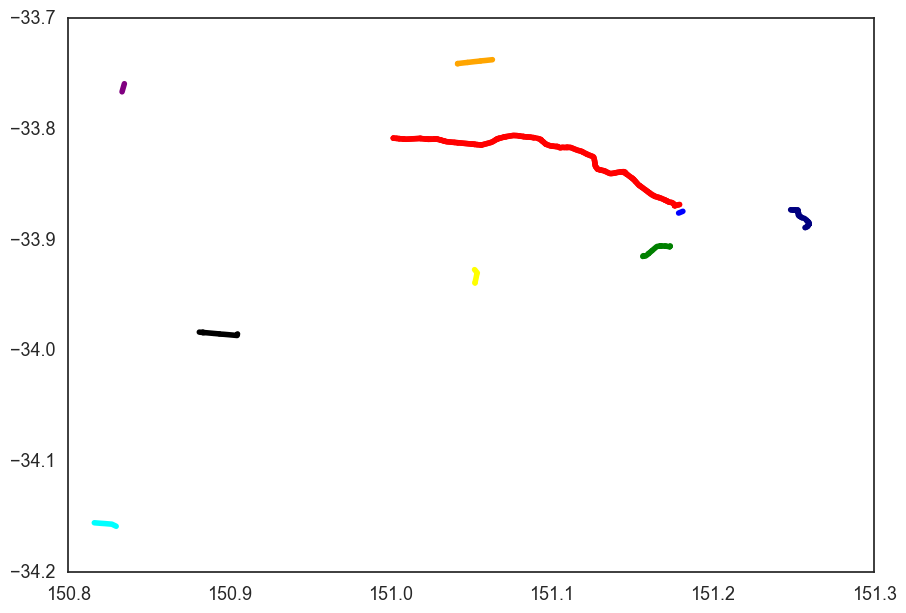

In [32]:
colours = ["red", "blue", "green", "yellow", "purple", "black", "orange", "navy", "cyan"]
sns.set_context("talk")
# colours = sns.color_palette(None,9)
# vic_road_merge = merge_lines(victoria_road)
# plt.rcParams['figure.figsize']=(20,12)
ax = plt.gca()
for l, line in enumerate(vic_road_merge["geometry"]):
#     for s, seg in enumerate(line):
        gpd.GeoDataFrame(geometry = vic_road_merge["geometry"].iloc[l]).plot(color = colours[l], ax = ax, figsize = (12, 20),
                                                                            linewidth = 4)
    
ax.get_xaxis().get_major_formatter().set_useOffset(False)
# ax.set_xlabel("longitude")
# ax.set_ylabel("latiude")
# ax.set_title("Victoria Road")

ax.figure.savefig("victoria_clean.png")

In [214]:
streets_reduced_linemerge = streets.groupby("name")['geometry'].apply(lambda x: shapely.ops.linemerge(x.values) ).(rename("merged_line").reset_index())

s = streets_reduced_linemerge.apply(lambda x: pd.Series(x['merged_line']),axis=1).stack().reset_index(level=1)

In [222]:
len(streets), len(streets_reduced_linemerge)

(72798, 29520)

In [220]:
s = streets_reduced_linemerge.apply(lambda x: pd.Series(x['merged_line']),axis=1).stack().reset_index(level=1, drop = True).rename("lines")
streets_reduced_linemerge.drop('merged_line', axis=1).join(s)

,name,lines
0,"(steep, rough track)",LINESTRING (150.8365482405775 -34.054023160669...
1,"(walking track, steep sections, rough surface)",LINESTRING (150.8497772307182 -34.079535913730...
1,"(walking track, steep sections, rough surface)",LINESTRING (150.8522587769717 -34.080268408248...
2,0+4+4 steps,LINESTRING (151.2313620315879 -33.918242615686...
3,1,LINESTRING (151.1917438765909 -33.872509024133...
4,1 road,LINESTRING (151.0208514553944 -33.843009083552...
5,10 road,LINESTRING (151.0203149297723 -33.842935574261...
6,100 metre hill,LINESTRING (151.2491582369488 -33.730503658758...
7,104,LINESTRING (150.9689275768912 -34.183576538328...
8,105,LINESTRING (150.9694203489789 -34.180166612479...


In [221]:
streets_reduced_linemerge

,name,merged_line
0,"(steep, rough track)",LINESTRING (150.8365482405775 -34.054023160669...
1,"(walking track, steep sections, rough surface)",(LINESTRING (150.8497772307182 -34.07953591373...
2,0+4+4 steps,LINESTRING (151.2313620315879 -33.918242615686...
3,1,LINESTRING (151.1917438765909 -33.872509024133...
4,1 road,LINESTRING (151.0208514553944 -33.843009083552...
5,10 road,LINESTRING (151.0203149297723 -33.842935574261...
6,100 metre hill,LINESTRING (151.2491582369488 -33.730503658758...
7,104,LINESTRING (150.9689275768912 -34.183576538328...
8,105,LINESTRING (150.9694203489789 -34.180166612479...
9,108 management trail,LINESTRING (150.982058834041 -34.1561159147895...


In [34]:
val = victoria_road.groupby("name")['geometry'].apply(lambda x: shapely.ops.linemerge(x.values) ).iloc[0]

In [58]:
print(val)

MULTILINESTRING ((150.8298032392747 -34.15843451684535, 150.8293112215584 -34.15804274669102, 150.827125891763 -34.15651707267536, 150.824228351655 -34.15616637384659, 150.8230264705589 -34.15601181155208, 150.8204622787401 -34.15575431948659, 150.8162348658745 -34.15525400368617), (150.8334433321849 -33.76640008110822, 150.8336361997769 -33.76539827604094, 150.8336591661916 -33.76527841482556, 150.8337450806991 -33.76483216230059, 150.8339722302752 -33.76365081686731, 150.8341453165757 -33.76280432846581, 150.8342266210365 -33.76240685861734, 150.8342985377656 -33.76203771960158, 150.8346123562205 -33.76042780745905, 150.8348861929972 -33.75908267963774), (150.8813690428743 -33.98322281712458, 150.8815617428282 -33.98325190232859, 150.8819514175068 -33.98332440579102, 150.8833294862076 -33.98349765972964), (150.8833294862076 -33.98349765972964, 150.8835212641521 -33.98349556425384, 150.8835983776614 -33.98348131501845, 150.8836636726871 -33.98348030919007), (150.8836599846497 -33.9835

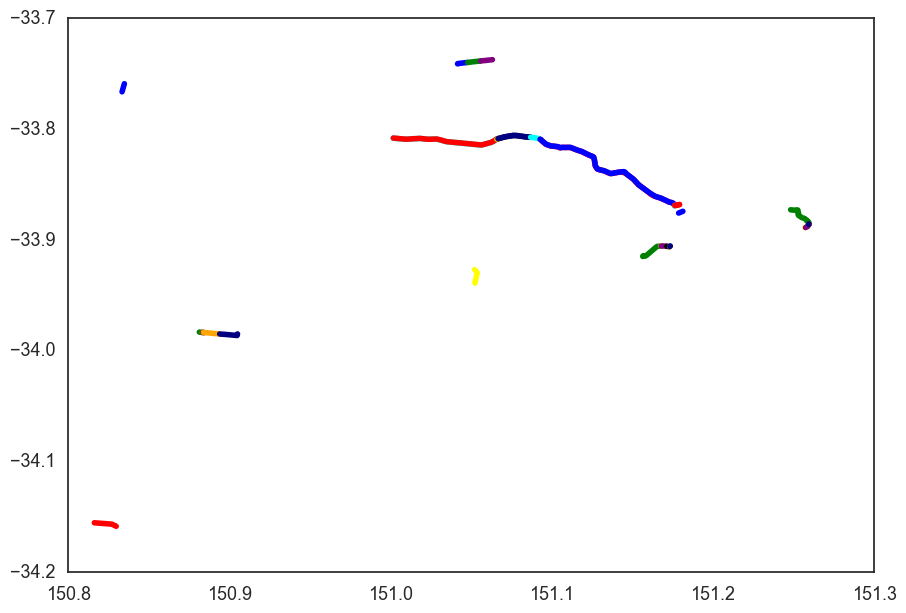

In [36]:
colours = ["red", "blue", "green", "yellow", "purple", "black", "orange", "navy", "cyan"]

ax = plt.gca()
for l, line in enumerate(val):
    gpd.GeoDataFrame(geometry = [val[l]]).plot(color = colours[l%9], ax = ax, linewidth = 4)

ax.get_xaxis().get_major_formatter().set_useOffset(False)
# ax.set_xlabel("longitude")
# ax.set_ylabel("latiude")
# ax.set_title("Victoria Road")
ax.figure.savefig("victoria_linemerge.png")

In [186]:
vic_parade_reduce = victoria_road.groupby("name").apply(lambda x: reduce_street_2(x))

In [189]:
vic_parade_reduce

access  \
name                                                                 
victoria road 0  [[[[[[[None], [None], [None], [None]], [[None]...   
              1  [[[[[[[None], [None], [None], [None], [None], ...   
              2  [[[[[[[None], [None], [None]], [[None], [None]...   
              3  [[[[[[[None], [None]], [[None], [None]]], [[[N...   
              4  [[[[[[[None], [None], [None]], [[None], [None]...   
              5  [[[[[[[None], [None], [None]], [[None], [None]...   
              6  [[[[[[[None], [None], [None], [None], [None], ...   
              7  [[[[[[[None], [None]], [[None], [None]]], [[[N...   

                                                            bridge  \
name                                                                 
victoria road 0  [[[[[[[0], [0], [0], [0]], [[1], [1], [1], [0]...   
              1  [[[[[[[0], [0], [0], [0], [0], [0], [0], [0], ...   
              2  [[[[[[[0], [0], [1]], [[0], [0], [1]]], [[[0],...   
              3  [[[[[[[0], [0]], [[0], [0]]], [[[0], [0]], [[0...   
              4  [[[[[[[0], [0], [0]], [[0], [0], [0]], [[0], [...   
              5  [[[[[[[0], [0], [0]], [[0], [0], [0]], [[0], [...   
              6  [[[[[[[0], [0], [0], [0], [0], [0], [0], [0], ...   
              7  [[[[[[[0], [0]], [[0], [0]]], [[[0], [0]], [[0...   

                                                             class  \
name                                                                 
victoria road 0  [[[[[[['highway'], ['highway'], ['highway'], [...   
              1  [[[[[[['highway'], ['highway'], ['highway'], [...   
              2  [[[[[[['highway'], ['highway'], ['highway']], ...   
              3  [[[[[[['highway'], ['highway']], [['highway'],...   
              4  [[[[[[['highway'], ['highway'], ['highway']], ...   
              5  [[[[[[['highway'], ['highway'], ['highway']], ...   
              6  [[[[[[['highway'], ['highway'], ['highway'], [...   
              7  [[[[[[['highway'], ['highway']], [['highway'],...   

                                                          geometry  \
name                                                                 
victoria road 0  [LINESTRING (151.0016784386182 -33.80819468108...   
              1  [LINESTRING (151.173548944096 -33.905479575542...   
              2  [LINESTRING (151.0521199775451 -33.92683943085...   
              3  [LINESTRING (150.8334433321849 -33.76640008110...   
              4  [LINESTRING (150.8940186758676 -33.98487891355...   
              5  [LINESTRING (151.0416409221976 -33.74090685788...   
              6  [LINESTRING (151.2590352201914 -33.88693746461...   
              7  [LINESTRING (150.8298032392747 -34.15843451684...   

                                                                id  \
name                                                                 
victoria road 0  [[[[[[[885.0], [45130.0], [80376.0], [86655.0]...   
              1  [[[[[[[1439.0], [7053.0], [21624.0], [47988.0]...   
              2  [[[[[[[15208.0], [15208.0], [15247.0]], [[1520...   
              3  [[[[[[[17192.0], [17192.0]], [[17192.0], [1719...   
              4  [[[[[[[53344.0], [53344.0], [115185.0]], [[533...   
              5  [[[[[[[53357.0], [53357.0], [73057.0]], [[5335...   
              6  [[[[[[[83156.0], [83156.0], [83160.0], [83162....   
              7  [[[[[[[91621.0], [91621.0]], [[91621.0], [9162...   

                            name  \
name                               
victoria road 0  [victoria road]   
              1  [victoria road]   
              2  [victoria road]   
              3  [victoria road]   
              4  [victoria road]   
              5  [victoria road]   
              6  [victoria road]   
              7  [victoria road]   

                                                            oneway  \
name                                                                 
victoria road 0  [[[[[[[0], [1], [1], [1]], [[1], [1],

In [199]:
victoria_road

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order,buffer_geometry
884,None,0,highway,LINESTRING (151.0016784386182 -33.808194681083...,885.0,victoria road,0,4085524.0,None,None,0,secondary,5.0,POLYGON ((151.0032559588228 -33.79831892242618...
1209,None,0,highway,LINESTRING (151.178704652738 -33.8757890304835...,1210.0,victoria road,0,4338718.0,None,None,0,residential,3.0,"POLYGON ((151.1738218591528 -33.8670731560912,..."
1438,None,0,highway,LINESTRING (151.173548944096 -33.9054795755428...,1439.0,victoria road,0,4574898.0,None,None,0,residential,3.0,POLYGON ((151.1817130184552 -33.91123990455313...
2458,None,0,highway,LINESTRING (151.1458370310999 -33.840149681103...,2459.0,victoria road,1,4987368.0,A40,None,0,trunk,8.0,POLYGON ((151.1279013600059 -33.84671816574105...
2463,None,0,highway,LINESTRING (151.1007298191716 -33.815414433381...,2464.0,victoria road,1,4987302.0,A40,None,0,trunk,8.0,POLYGON ((151.1025196512228 -33.82566250137184...
2732,None,1,highway,LINESTRING (151.1465183960088 -33.840786705745...,2733.0,victoria road,1,5066693.0,A40,None,0,trunk_link,23.0,POLYGON ((151.1390076398048 -33.84745443397716...
5119,None,1,highway,LINESTRING (151.160572752155 -33.8573997216540...,5120.0,victoria road,1,9283459.0,A40,None,0,trunk,28.0,POLYGON ((151.1704669952158 -33.85292414174517...
5123,None,1,highway,LINESTRING (151.1497476918445 -33.844256562201...,5124.0,victoria road,1,9283781.0,A40,None,0,trunk,28.0,POLYGON ((151.1417336258577 -33.85035301268456...
7052,None,0,highway,LINESTRING (151.1678727192669 -33.905543529464...,7053.0,victoria road,1,13858769.0,None,None,0,residential,3.0,POLYGON ((151.1679476928706 -33.91554343718636...
11483,None,0,highway,LINESTRING (151.0285158676563 -33.809105710139...,11484.0,victoria road,1,22672963.0,A40,None,0,trunk,8.0,POLYGON ((151.0273471725095 -33.79911249401314...


In [205]:
victoria_road["buffer_geometry"] = victoria_road["geometry"].apply(lambda x: x.buffer(.001))

In [208]:
# victoria_road["buffer_geometry"].apply(lambda x: shapely.ops.linemerge([y for y in x]) )
from shapely.ops import cascaded_union

# lines = [
#     LineString([(845, 555), (365, -5), (130, -650)]),
#     LineString([(740, 605), (640, 60), (315, -375)]),
#     LineString([(0, -500), (655, -150), (900, 300)]),
# ]

# # Two example unions
# unioned_lines = cascaded_union(lines)
vic_road_unioned_buffered_poly = cascaded_intersection([l.buffer(50) for l in victoria_road["buffer_geometry"].values])

NameError: name 'cascaded_intersection' is not defined